In [1]:
# import the required modules
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# getting to know the available match methods in opencv
temp = [i for i in dir(cv) if i.startswith('match')]
print("No of available templates are: {}".format(len(temp)))
print(temp)

No of available templates are: 2
['matchShapes', 'matchTemplate']


In [3]:
# getting to know the available template matching methods in opencv
tempmat = [i for i in dir(cv) if i.startswith('TM')]
print("No of available template matchings are: {}".format(len(tempmat)))
print(tempmat)

No of available template matchings are: 6
['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED']


(470, 470, 3)

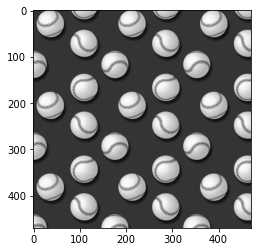

In [4]:
# reading and plotting the image
img1 = cv.imread('baseballs.jpg')
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2GRAY), cmap ='gray')
img1.shape

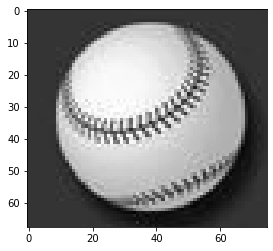

In [5]:
# getting the template by slicing the image
img2 = img1[172:240, 175:250]
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2GRAY), cmap = 'gray')

In [6]:
img2.shape

(68, 75, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'CCOEFF Result')

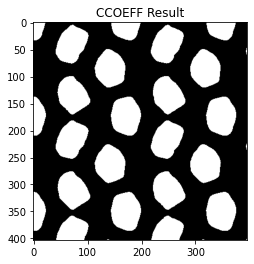

In [7]:
tm_cff = cv.matchTemplate(img1, img2, cv.TM_CCOEFF)
plt.imshow(cv.cvtColor(tm_cff, cv.COLOR_BGR2RGB))
plt.title("CCOEFF Result")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'CCOEFF_NORMED Result')

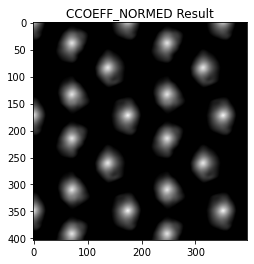

In [8]:
tm_cffn = cv.matchTemplate(img1, img2, cv.TM_CCOEFF_NORMED)
plt.imshow(cv.cvtColor(tm_cffn, cv.COLOR_BGR2RGB))
plt.title("CCOEFF_NORMED Result")

Text(0.5, 1.0, 'Matched template on original image')

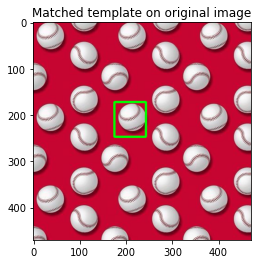

In [9]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(tm_cffn)

top_left = max_loc
bottom_right = (top_left[0] + img2.shape[0], top_left[1] + img2.shape[1])
cv.rectangle(img1, top_left, bottom_right, (0, 255, 0), 3)

plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title("Matched template on original image")

Text(0.5, 1.0, 'Finding all the matched templates')

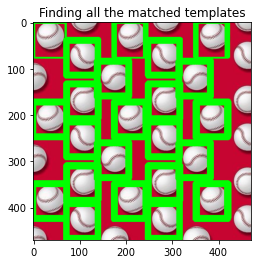

In [10]:
min_val, max_val, min_loc, max_loc = cv.minMaxLoc(tm_cffn)

loc = np.where(tm_cffn >= 0.65)

for i in zip(*loc[::-1]):
    cv.rectangle(img1, i, (i[0] + 68, i[1] + 75), (0, 255, 0), 1)
  


plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title("Finding all the matched templates")

Text(0.5, 1.0, 'CCORR Result')

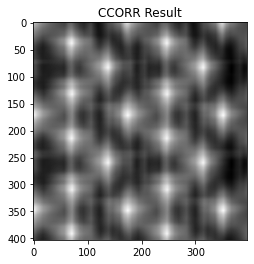

In [11]:
tm_crr = cv.matchTemplate(img1, img2, cv.TM_CCORR)
plt.imshow(tm_crr, cmap = 'gray')
plt.title("CCORR Result")

Text(0.5, 1.0, 'CCORR_NORMED Result')

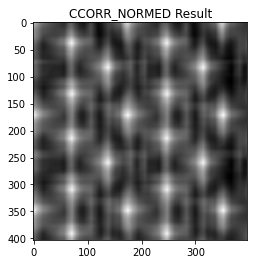

In [12]:
tm_crrn = cv.matchTemplate(img1, img2, cv.TM_CCORR_NORMED)
plt.imshow(tm_crrn, cmap = 'gray')
plt.title("CCORR_NORMED Result")

Text(0.5, 1.0, 'SQDIFF Result')

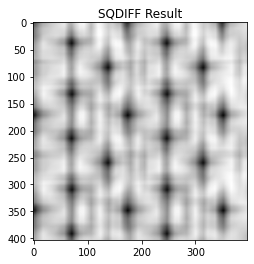

In [13]:
tm_sq = cv.matchTemplate(img1, img2, cv.TM_SQDIFF)
plt.imshow(tm_sq, cmap = 'gray')
plt.title("SQDIFF Result")

Text(0.5, 1.0, 'SQDIFF_NORMED Result')

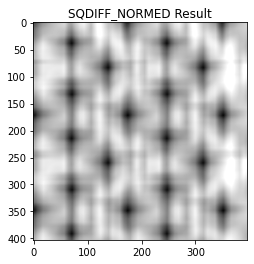

In [14]:
tm_sqn = cv.matchTemplate(img1, img2, cv.TM_SQDIFF_NORMED)
plt.imshow(tm_sqn, cmap = 'gray')
plt.title("SQDIFF_NORMED Result")

In [ ]:
# Squarred Difference from Scratch

# reading and getting the dimensions of an image
img1 = cv.imread('goku.png')
Hgt, Wdt = img1.shape[0], img1.shape[1]

# creating a template from original image to search for
# getting the height and width of the template image
template = img1[600:1250, 2000:2800]
hgt, wdt = template.shape[0], template.shape[1] 

# creating an empty image of required size to store the result
result = np.zeros([Hgt - hgt + 1, Wdt - wdt + 1])

# iterating through the height and width of the result image
for i in range(Hgt - hgt + 1):
    for j in range(Wdt - wdt + 1):
        
        # according to the Square Difference principle
        # updating the pixel values of original image  
        temp = img1[i:i + hgt, j:j + wdt]
        
        result[i, j] = np.sum((template - temp) ** 2)


In [ ]:
plt.imshow(result)
plt.title("SQ_DIFF from Scratch")

In [ ]:
# Cross-correlation from scratch

# reading and getting the dimensions of an image
img2 = cv.imread('goku.png')
Hgt1, Wdt1 = img2.shape[0], img2.shape[1]

# creating a template from original image to search for
# getting the height and width of the template image
template1 = img2[600:1250, 2000:2800]
hgt1, wdt1 = template1.shape[0], template1.shape[1] 

# creating an empty image of required size to store the result
result1 = np.zeros([Hgt1 - hgt1 + 1, Wdt1 - wdt1 + 1])

# iterating through the height and width of the result image
for i1 in range(Hgt1 - hgt1 + 1):
    for j1 in range(Wdt1 - wdt1 + 1):
        
        # according to the Square Difference principle
        # updating the pixel values of original image  
        temp1 = img1[i1:i1 + hgt1, j1:j1 + wdt1]
        
        result1[i1, j1] = np.sum((template1 * temp1))

In [ ]:
plt.imshow(result1)
plt.title("CCORR from Scratch")